# Funções de Pertinência para Lógica Fuzzy
Este notebook implementa 7 funções de pertinência comuns utilizadas em lógica fuzzy.

In [36]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Função Triangular

In [37]:
def triangular(x, a, b, c):
    if a <= x < b:
        return (x - a) / (b - a)
    elif b <= x < c:
        return (c - x) / (c - b)
    else:
        return 0

## 2. Função Trapezoidal

In [38]:
def trapezoidal(x, a, b, c, d):
    if a <= x < b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return 1
    elif c < x <= d:
        return (d - x) / (d - c)
    else:
        return 0

## 3. Função Gaussiana

In [39]:
def gaussian(x, c, sigma):
    return np.exp(-0.5 * ((x - c) / sigma) ** 2)

## 4. Função Sigmoidal

In [40]:
def sigmoidal(x, a, c):
    return 1 / (1 + np.exp(-a * (x - c)))

## 5. Função Z

In [41]:
def z_function(x, a, b):
    if x <= a:
        return 1
    elif a < x < b:
        return 1 - 2 * ((x - a) / (b - a)) ** 2
    elif x >= b:
        return 0

## 6. Função S

In [42]:
def s_function(x, a, b):
    if x <= a:
        return 0
    elif a < x < b:
        return 2 * ((x - a) / (b - a)) ** 2
    elif x >= b:
        return 1

## 7. Função Pi

In [43]:
def pi_function(x, a, b, c):
    if x < b:
        return s_function(x, a, b)
    else:
        return z_function(x, b, c)

In [45]:
def calculate_membership(x, num_pertinences, types, params):
    
    results = []
    for i in range(num_pertinences):
        func_type = types[i]
        func_params = params[i]
        
        if func_type == 'triangular':
            results.append([triangular(val, *func_params) for val in x])
        elif func_type == 'trapezoidal':
            results.append([trapezoidal(val, *func_params) for val in x])
        elif func_type == 'gaussian':
            results.append([gaussian(val, *func_params) for val in x])
        elif func_type == 'sigmoidal':
            results.append([sigmoidal(val, *func_params) for val in x])
        elif func_type == 'z':
            results.append([z_function(val, *func_params) for val in x])
        elif func_type == 's':
            results.append([s_function(val, *func_params) for val in x])
        elif func_type == 'pi':
            results.append([pi_function(val, *func_params) for val in x])
        else:
            raise ValueError(f"Tipo de função desconhecido: {func_type}")
    
    return results

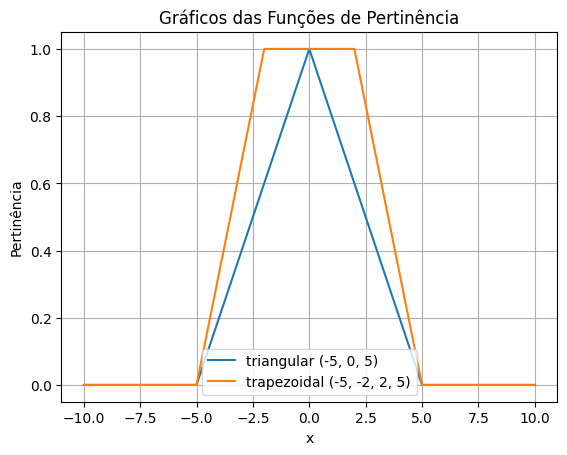

In [48]:
# Calcular e plotar os valores de pertinência
x = np.linspace(-10, 10, 1000)

# Configurações de entrada
num_pertinences = 2
types = ['triangular', 'trapezoidal', 'gaussian']
params = [(-5, 0, 5), (-5, -2, 2, 5), (0, 2)]

# Calcular os valores de pertinência
results = calculate_membership(x, num_pertinences, types, params)

# Plotar os gráficos
for i, result in enumerate(results):
    plt.plot(x, result, label=f"{types[i]} {params[i]}")

plt.legend()
plt.title("Gráficos das Funções de Pertinência")
plt.xlabel("x")
plt.ylabel("Pertinência")
plt.grid(True)
plt.show()